Mounting Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Light Detection

/content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Light Detection


Environment

In [ ]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


Test - CLI

In [ ]:
!yolo detect predict model=yolov8l.pt source="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg/1200px-LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg"

[INFO] - 1:  (800, 1200, 3)
[INFO] - 2:  (426, 640, 3)


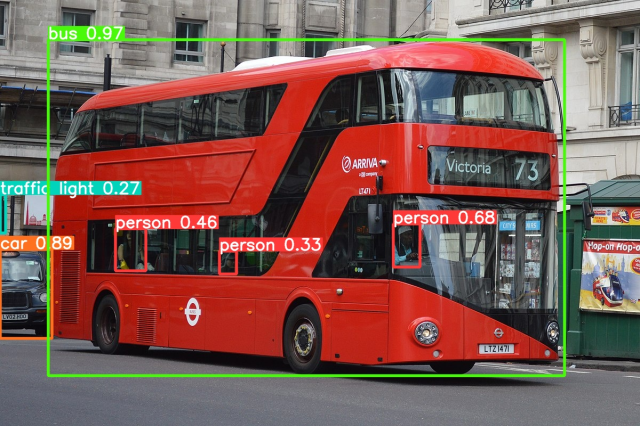

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path = "runs/detect/predict/1200px-LT_471_(LTZ_1471)_Arriva_London_New_Routemaster_(19522859218).jpg"
img = cv2.imread(path)
print("[INFO] - 1: ",img.shape)

img = imutils.resize(img, width=640)
print("[INFO] - 2: ",img.shape)

cv2_imshow(img)

Test - Python Implementation

In [ ]:
# # # # # # # # # # # # # # # #
# 1. Library
# 2. Image & Model
# 3. Prediction & Score
# 4. Show Result
# # # # # # # # # # # # # # # #


0: 448x640 3 persons, 1 car, 1 bus, 1 traffic light, 1875.6ms
Speed: 3.7ms preprocess, 1875.6ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


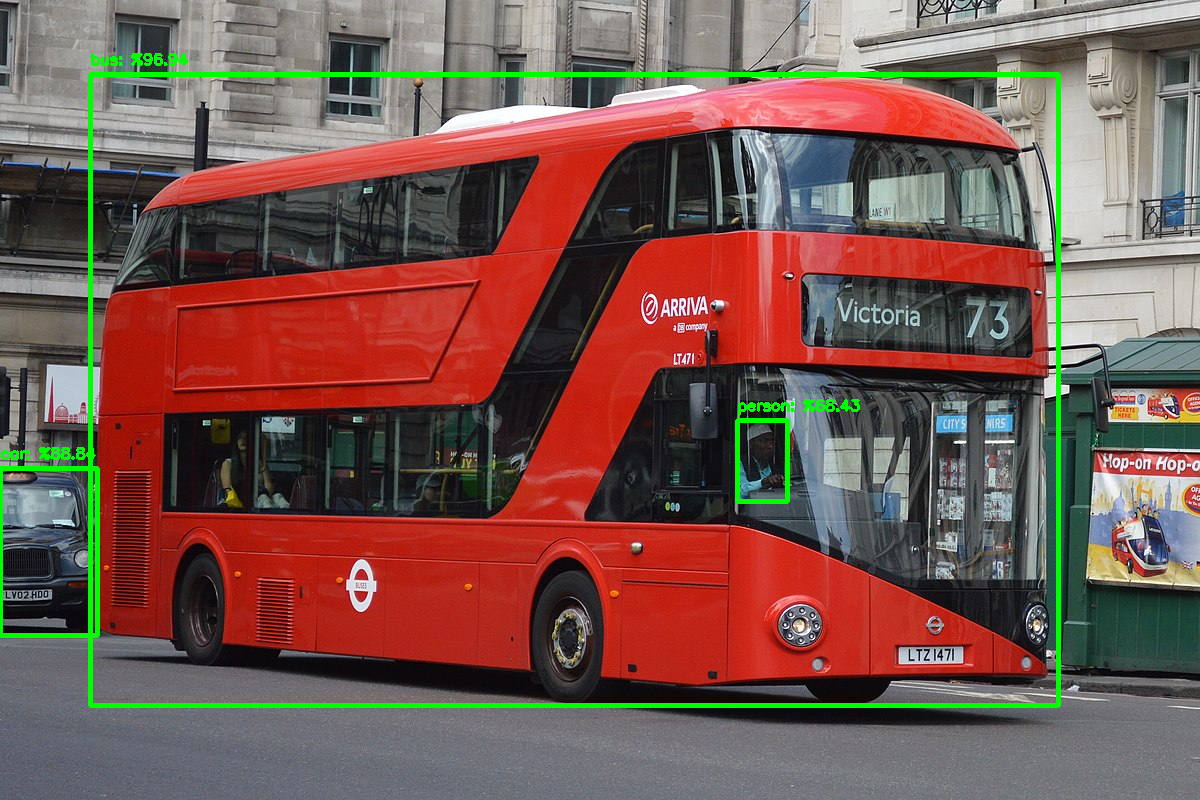

In [ ]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "test.jpg"
model_path = "yolov8l.pt"

img = cv2.imread(img_path)
model = YOLO(model_path)

results = model(img)[0]

for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > 0.5:
    cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 4)

    score = score * 100
    class_name = results.names[class_id]

    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 2)

cv2_imshow(img) # PC: cv2.imshow("Prediction", img)

Training

In [ ]:
%pwd

'/content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Light Detection'

In [ ]:
!unzip data/traffic_light_dataset.zip -d ./data

In [ ]:
!yolo detect train model=yolov8l.pt data=data/dataset/data.yaml imgsz=640 workers=8 batch=8 device=0 epochs=50 name=yolov8_traffic_light

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data/dataset/data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_traffic_light2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

In [ ]:
!yolo detect train model=runs/detect/yolov8_traffic_light2/weights/last.pt resume=True

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/yolov8_traffic_light2/weights/last.pt, data=data/dataset/data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_traffic_light2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, bo

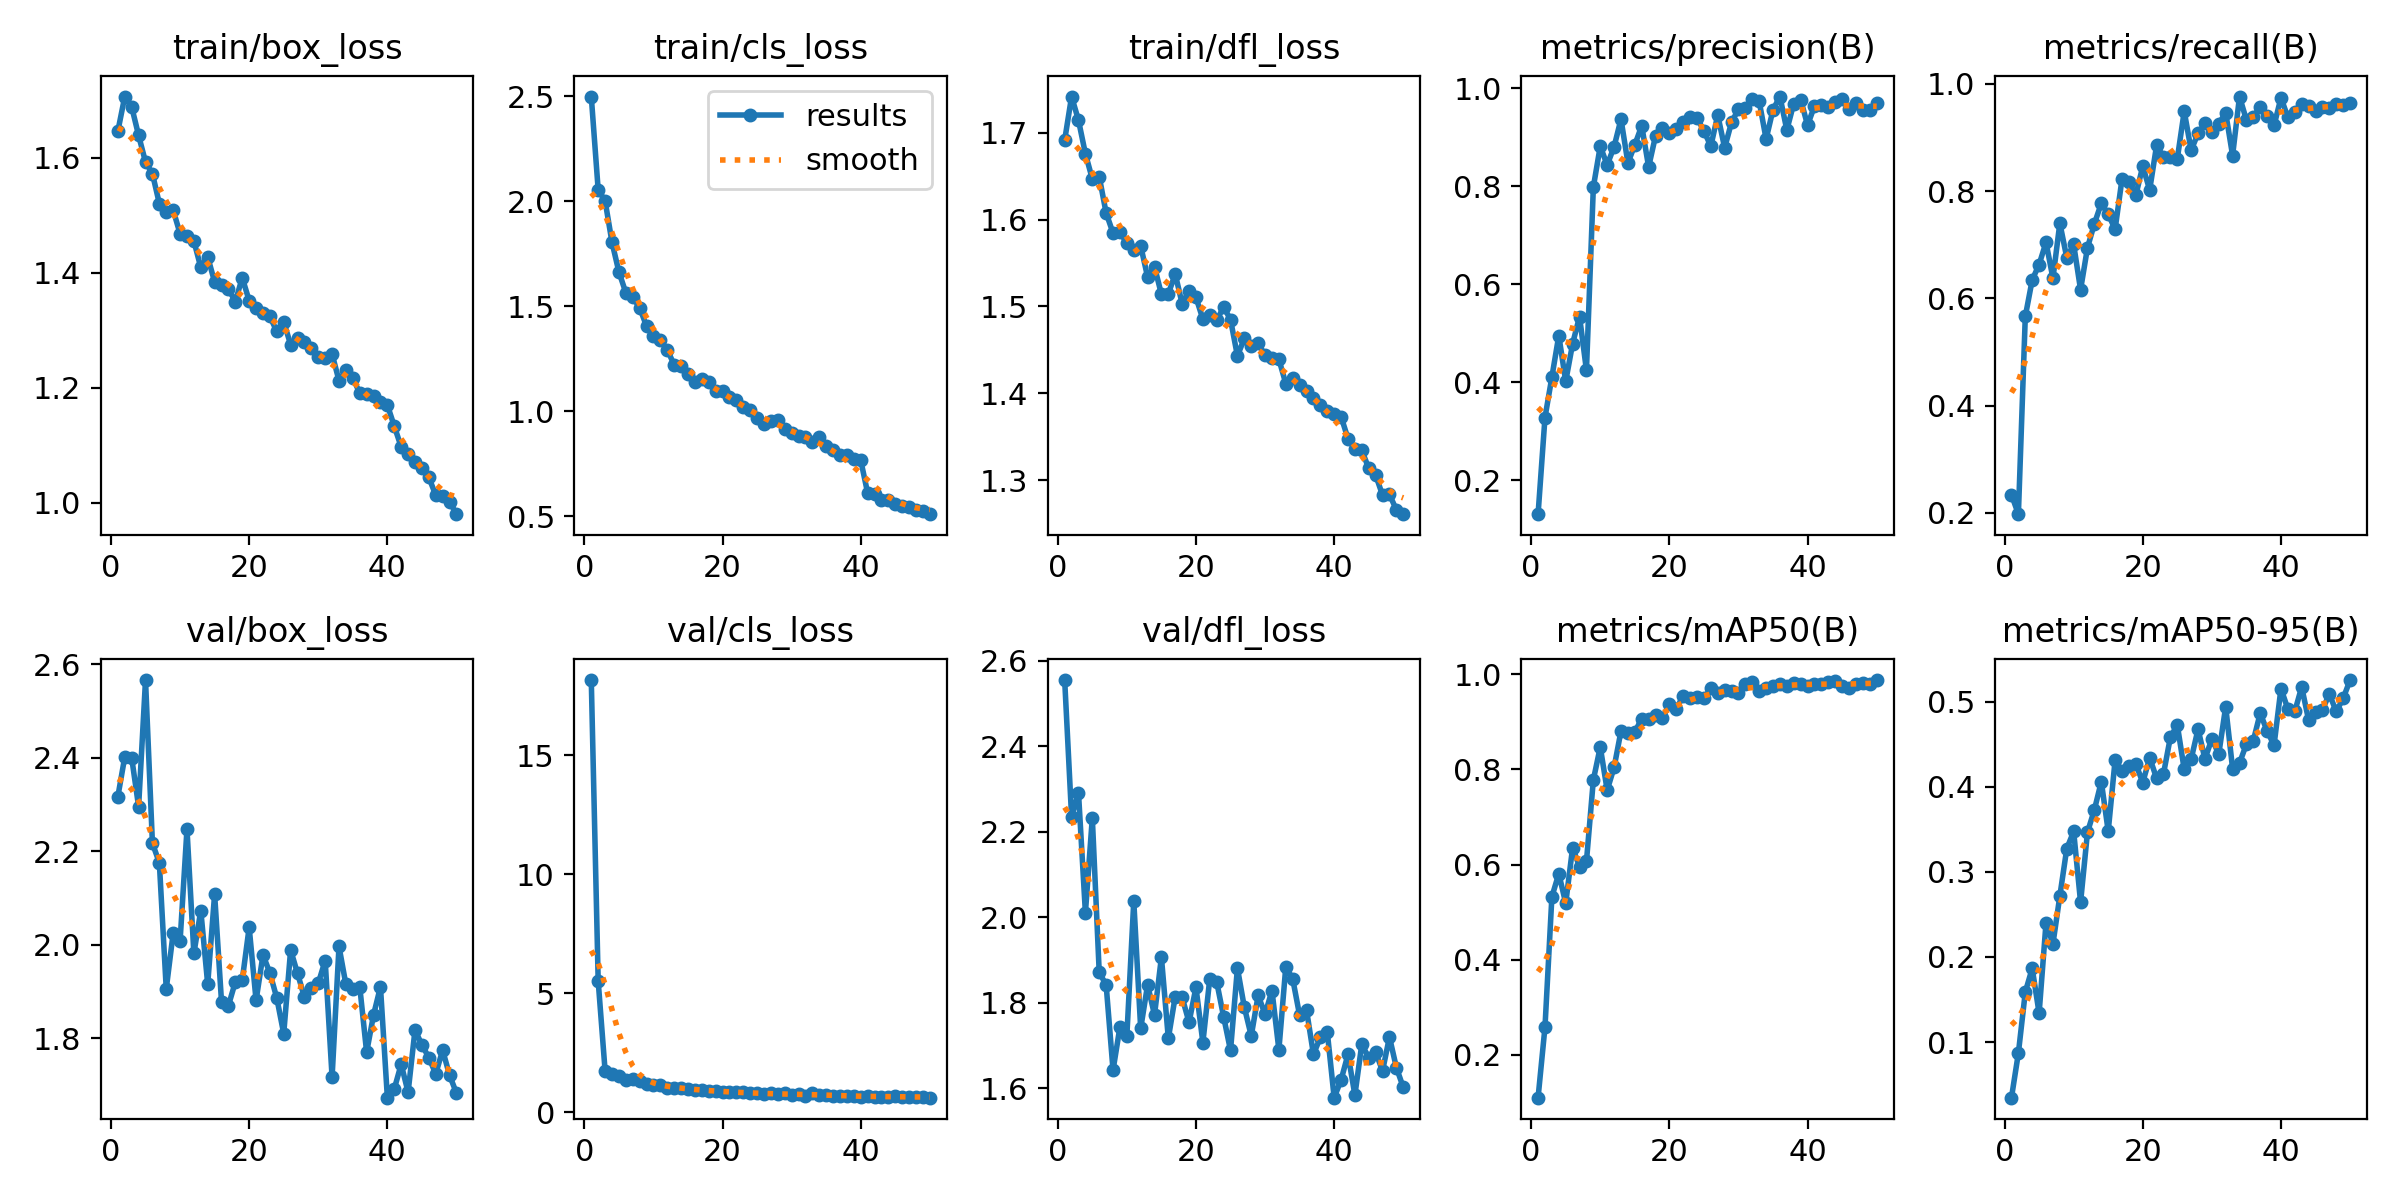

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/detect/yolov8_traffic_light2/results.png"
img = cv2.imread(img_path)

cv2_imshow(img)

Prediction - CLI

In [ ]:
!yolo detect predict model="runs/detect/yolov8_traffic_light2/weights/best.pt" source="inference/test.jpg"

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Light Detection/inference/test.jpg: 384x640 1 green, 1 red, 1 yellow, 64.4ms
Speed: 10.5ms preprocess, 64.4ms inference, 277.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


Prediction - Python Implementation


0: 384x640 1 green, 1 red, 1 yellow, 48.7ms
Speed: 2.9ms preprocess, 48.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


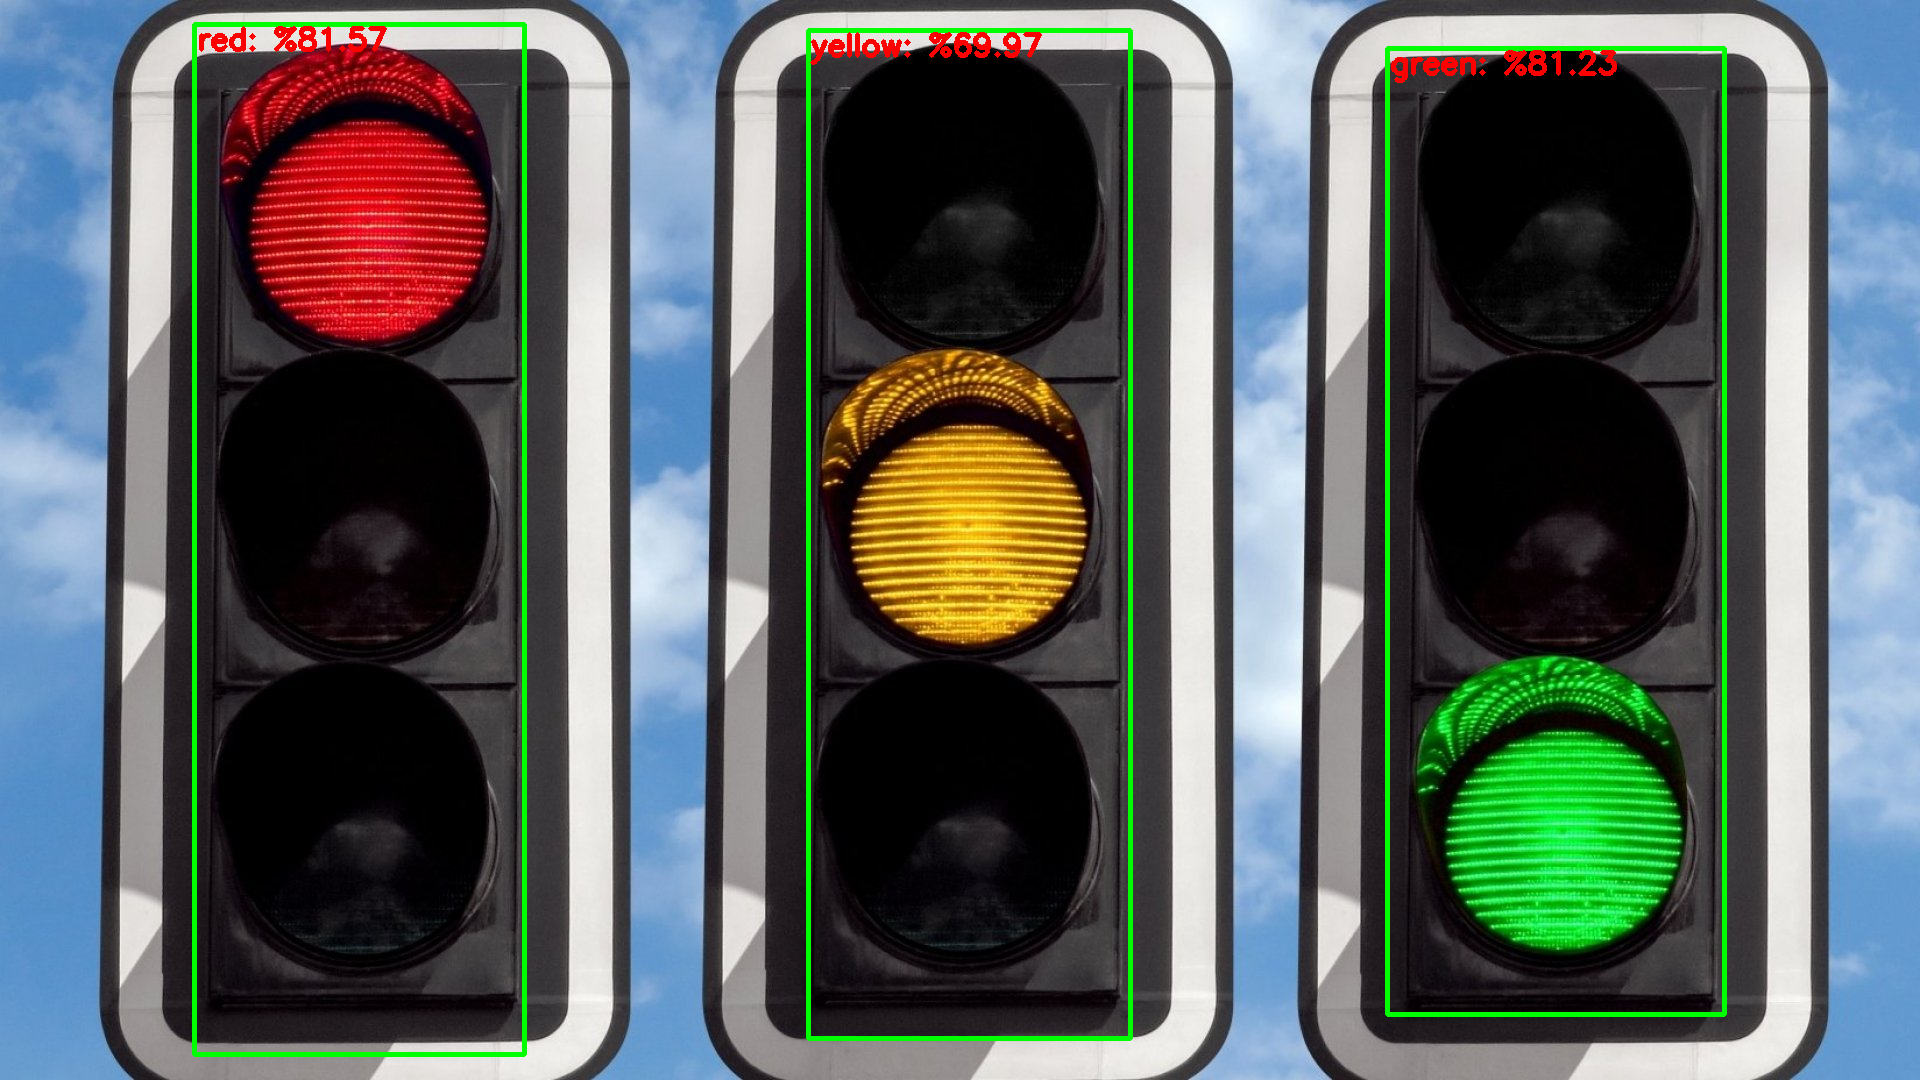

In [ ]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "inference/test.jpg"
model_path = "runs/detect/yolov8_traffic_light2/weights/best.pt"

img = cv2.imread(img_path)
model = YOLO(model_path)

results = model(img)[0]

for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > 0.5:
    cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 4)

    score = score * 100
    class_name = results.names[class_id]

    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1+3, y1+25), font, 1, (0,0,255), 4)

cv2_imshow(img) # PC: cv2.imshow("Prediction", img)